# Task 1 - Exploratory Data Analysis


---

## Section 1 - Setup


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

---

## Section 2 - Data loading



In [33]:
path = "/content/drive/MyDrive/Forage/Cognizant/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics

An explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


no missing values

In [9]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [14]:
df.describe(include='object').T

,count,unique,top,freq
transaction_id,7829,7829,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,1
timestamp,7829,7738,2022-03-02 19:32:20,2
product_id,7829,300,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,114
category,7829,22,fruit,998
customer_type,7829,5,non-member,1601
payment_type,7829,4,cash,2027


Based on the discription, we can conclude that 
- the following 3 are **categorical variables**:
category, customer_type, payment_type, unit_price
- quantity and total variables are continuous while quantity is discrete


---

## Section 4 - Visualisation



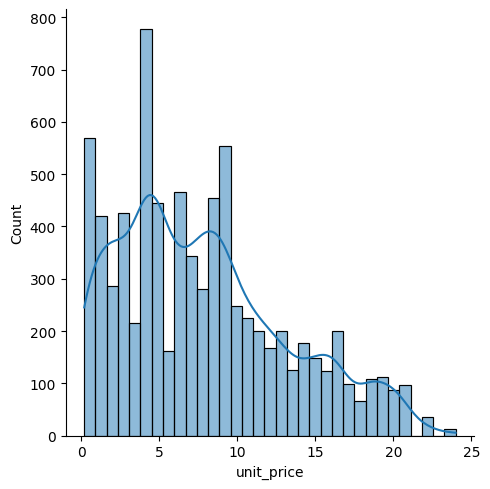

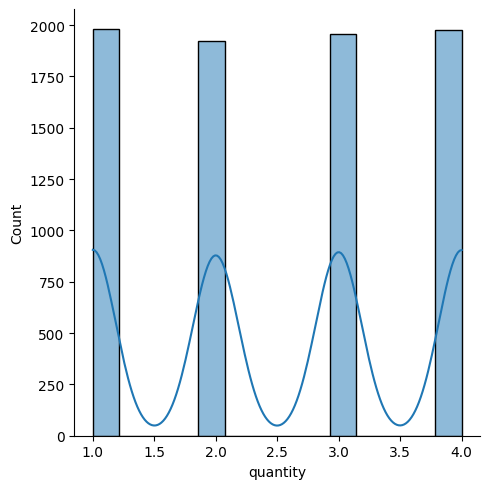

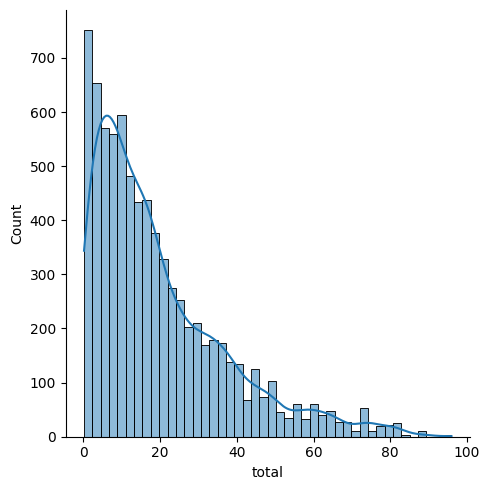

In [30]:
for column in ['unit_price', 'quantity', 'total']:
  sns.displot(x=df[column],  kde=True)

Heavily skewed to the right

#### Category

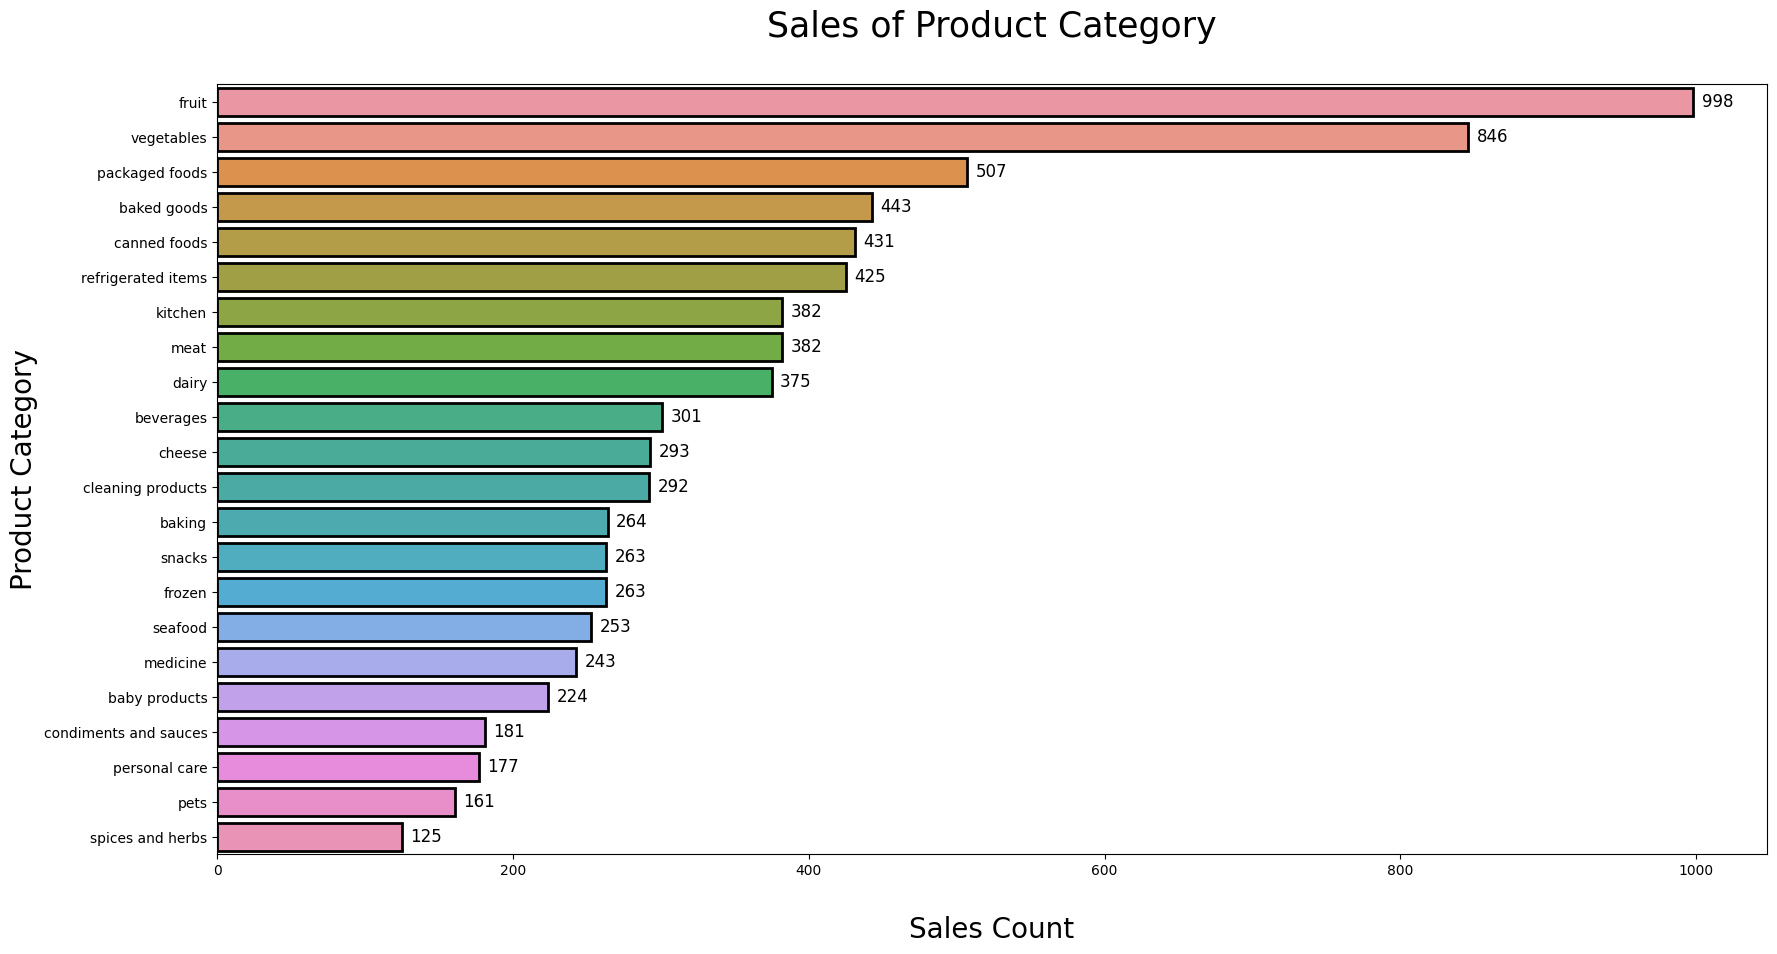

In [11]:
plt.subplots(figsize=(20, 10))
p=sns.countplot(y=df["category"],order=df["category"].value_counts().index[:], edgecolor = "black", linewidth = 2)
p.axes.set_title("Sales of Product Category\n",fontsize=25)
p.axes.set_ylabel("Product Category",fontsize=20)
p.axes.set_xlabel("\nSales Count",fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=12,color="black",rotation=0)
   
plt.show()

<Axes: xlabel='customer_type', ylabel='count'>

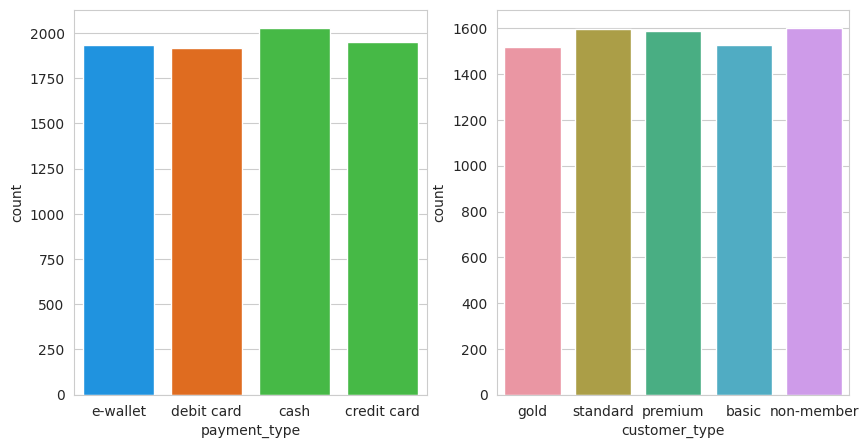

In [39]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x='payment_type', data=df,ax=axes[0])
sns.countplot(x='customer_type', data=df,ax=axes[1])

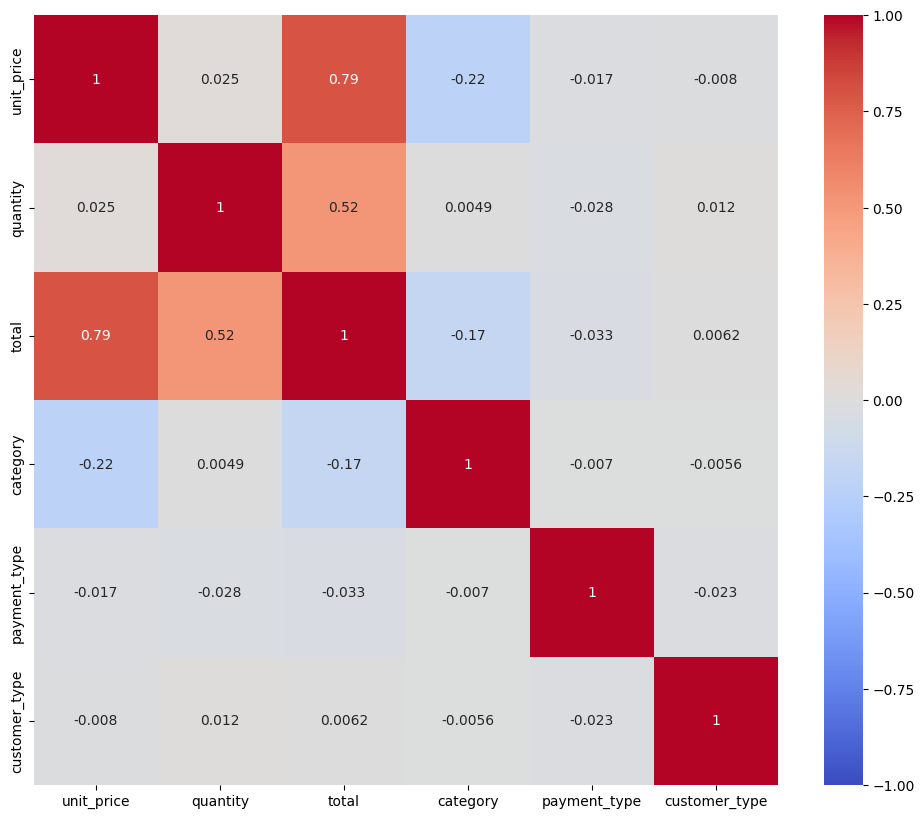

In [29]:
# correlation 
le = LabelEncoder()
for column in ['category', 'payment_type','customer_type']:
  df[column] = le.fit_transform(df[column])

corr_matrix = df[['unit_price', 'quantity', 'total', 'category', 'payment_type','customer_type']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

